In [176]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [177]:
def display(img1,img2):
    plt.figure(figsize=(35,35))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)

    plt.subplot(1, 2, 2)
    plt.imshow(img2)

In [178]:
img = cv2.imread(r"PATH/TO/IMAGE")

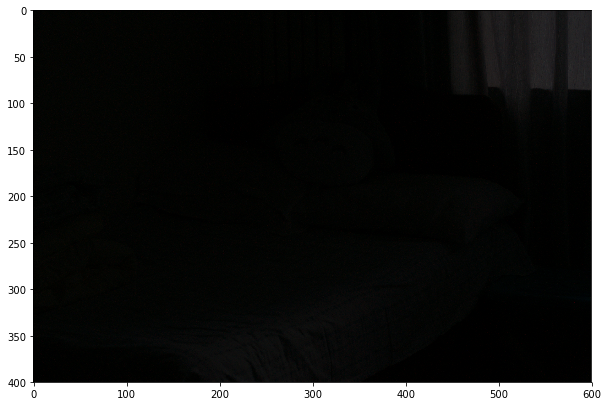

In [179]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

## Contrast Stretching 

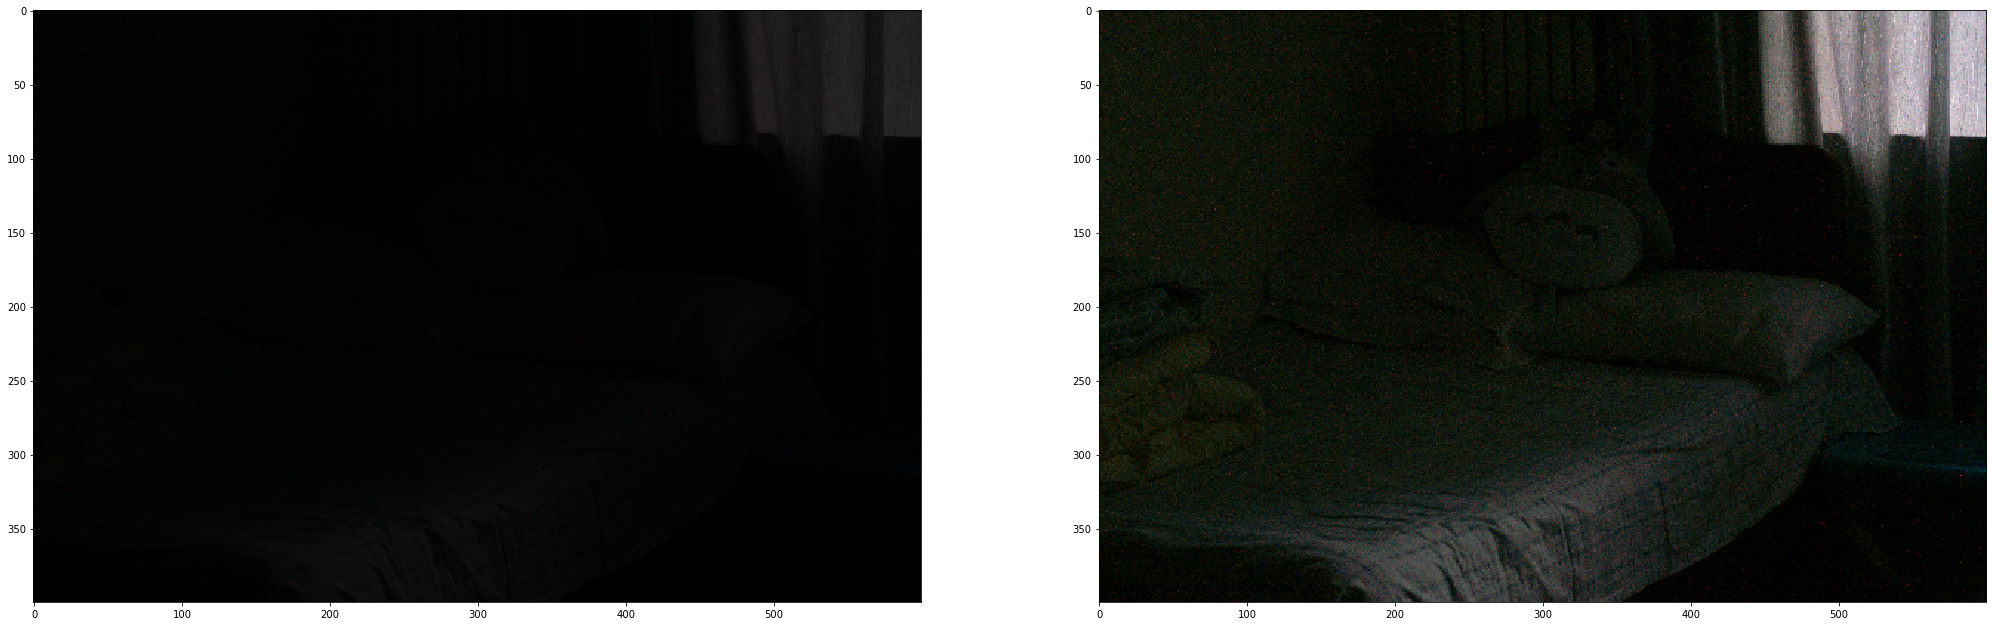

In [180]:
img_float = img.astype(np.float32)
min_val = np.min(img_float)
max_val = np.max(img_float)
stretched = ((img_float - min_val) / (max_val - min_val)) * 255
stretched = stretched.astype(np.uint8)
display(img,stretched)

## Noise Filtering

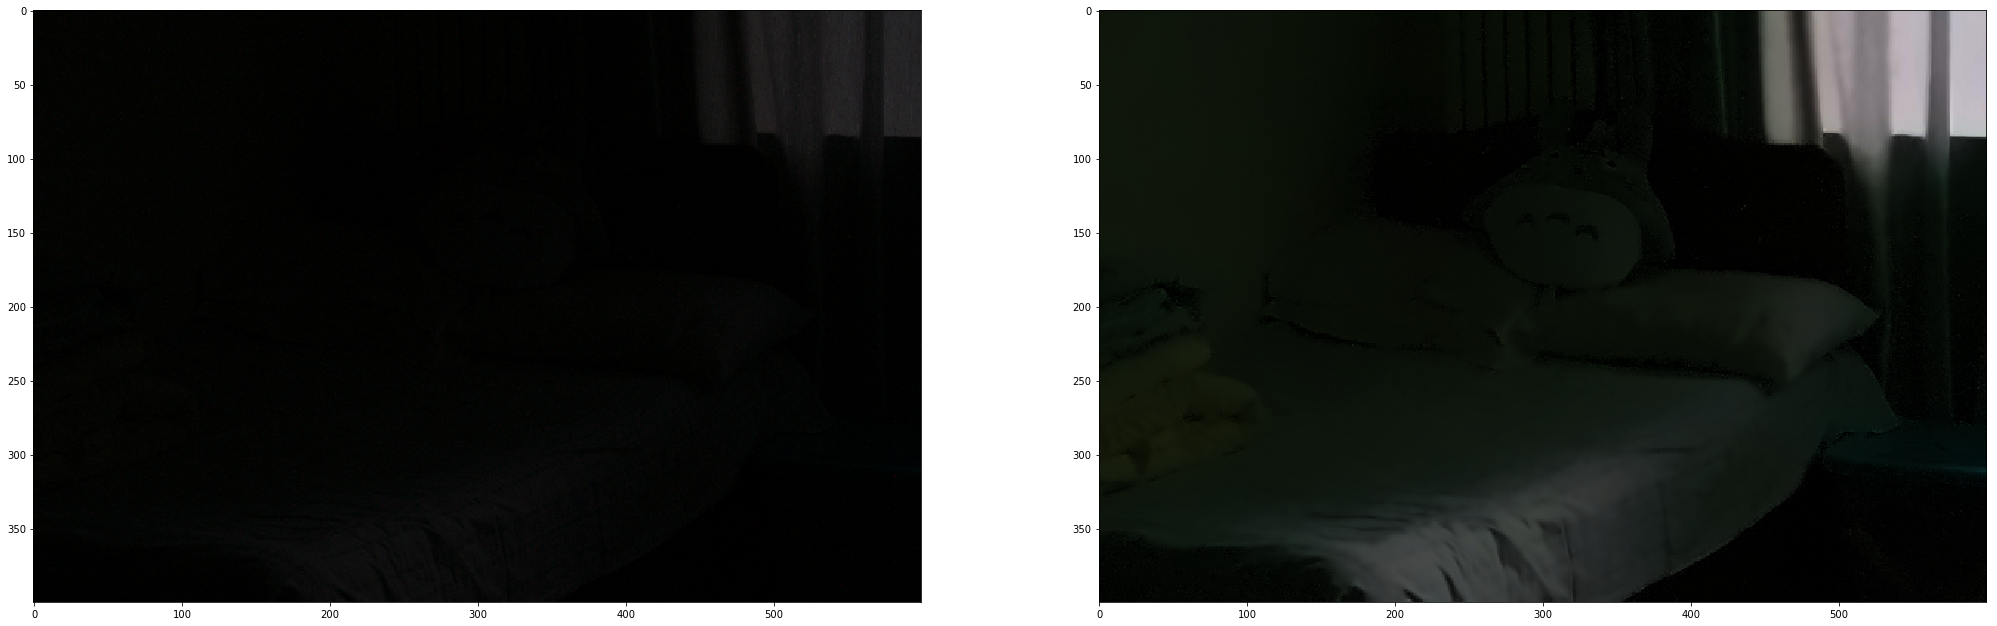

In [181]:
stretched = cv2.fastNlMeansDenoisingColored(stretched, None, h=10, hColor=20, templateWindowSize=7, searchWindowSize=35)
display(img,stretched)

## Global Exposure

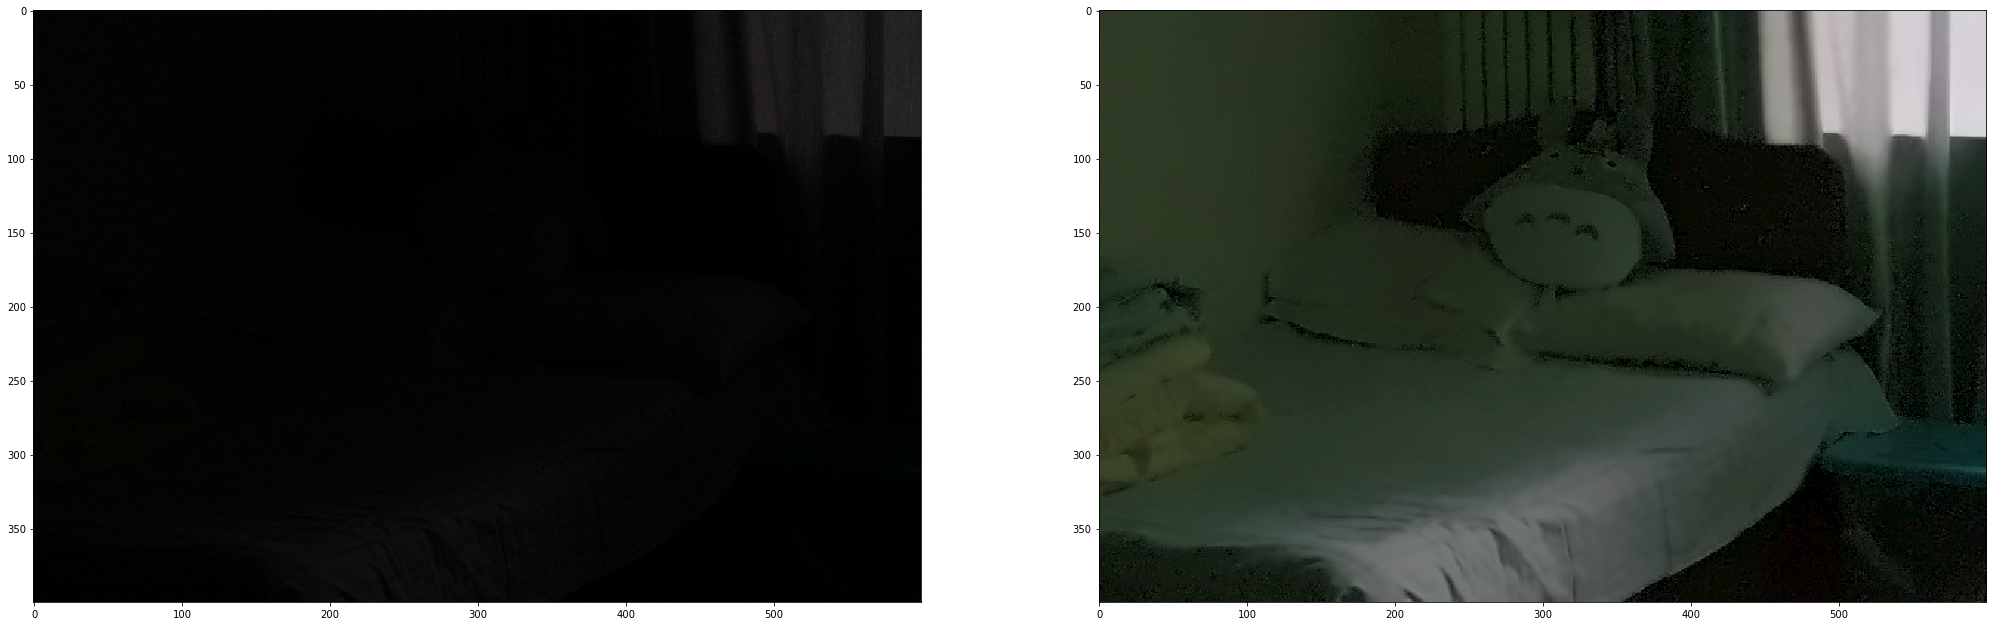

In [182]:
gamma = 0.6  # <1.0 for brightening, >1.0 for darkening
look_up_table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
img_exposed = cv2.LUT(stretched, look_up_table)
display(img,img_exposed)
# Output image when gamma correction is applied on a contrast stretched image

## White Balance Correction

In [183]:
def white_balance(img):
    result = img.copy().astype(np.float32)
    avg_b = np.mean(result[:, :, 0])
    avg_g = np.mean(result[:, :, 1])
    avg_r = np.mean(result[:, :, 2])
    avg_gray = (avg_b + avg_g + avg_r) / 3

    result[:, :, 0] *= avg_gray / avg_b
    result[:, :, 1] *= avg_gray / avg_g
    result[:, :, 2] *= avg_gray / avg_r
    print(f""" 
    avg_b: {avg_b} -> {avg_gray / avg_b}
    avg_g: {avg_g}  -> {avg_gray / avg_g}
    avg_r: {avg_r}  -> {avg_gray / avg_r}
    avg_gray: {avg_gray}
    """)
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

 
    avg_b: 43.82638931274414 -> 1.0548380128806325
    avg_g: 53.16099166870117  -> 0.8696177396857335
    avg_r: 41.70184326171875  -> 1.1085778900527827
    avg_gray: 46.22974141438802
    


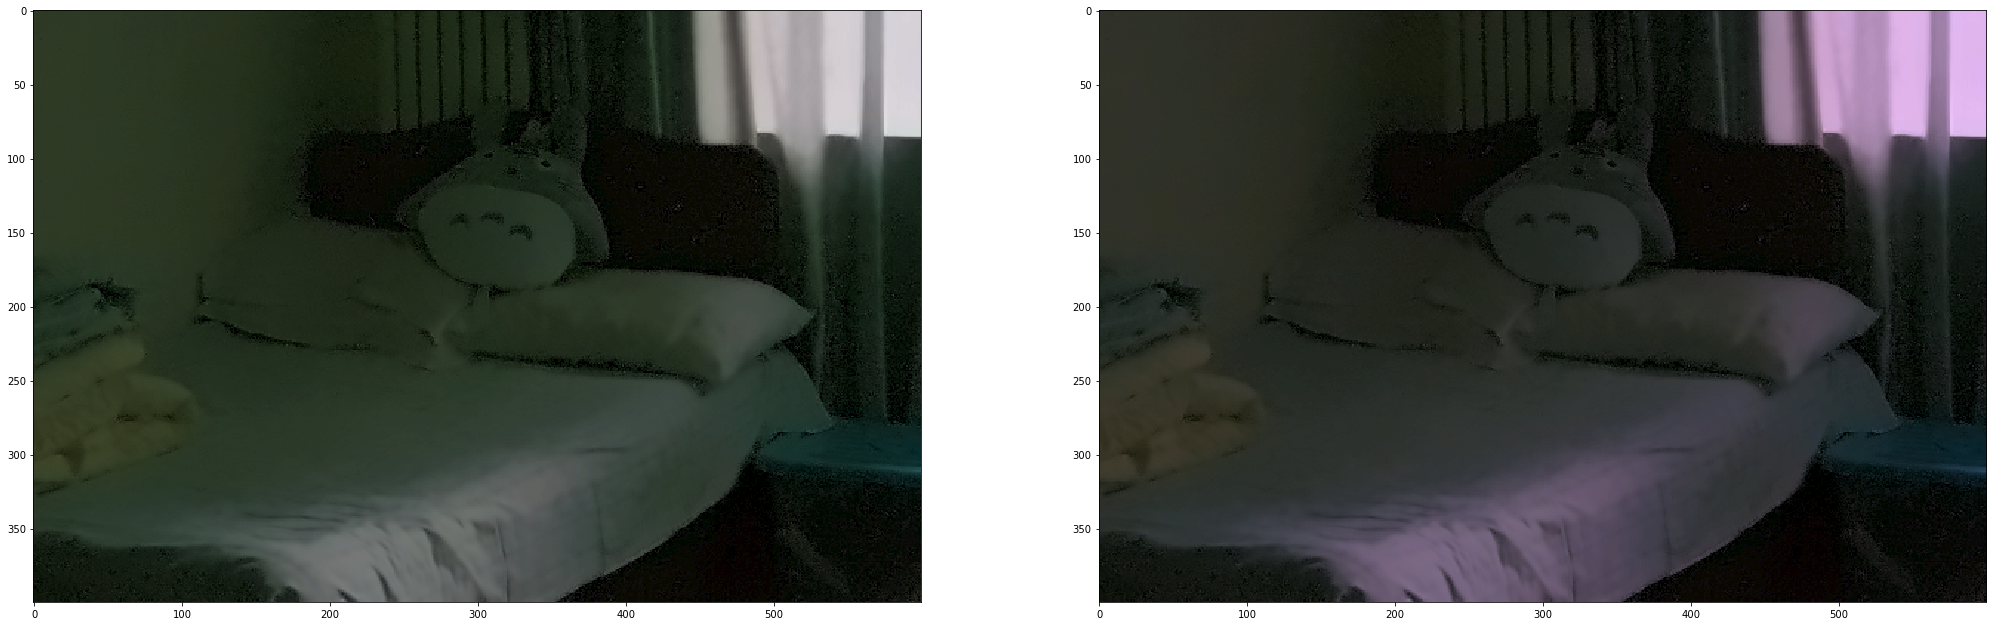

In [184]:
img_corrected = white_balance(img_exposed)
display(img_exposed,img_corrected)

In [185]:
img1 = cv2.cvtColor(img_corrected,cv2.COLOR_BGR2LAB)
L,A,B = cv2.split(img1)

In [186]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
l_eq = clahe.apply(L)

lab_eq = cv2.merge((l_eq, A, B))
img_exposed = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

## Colour Enhacement

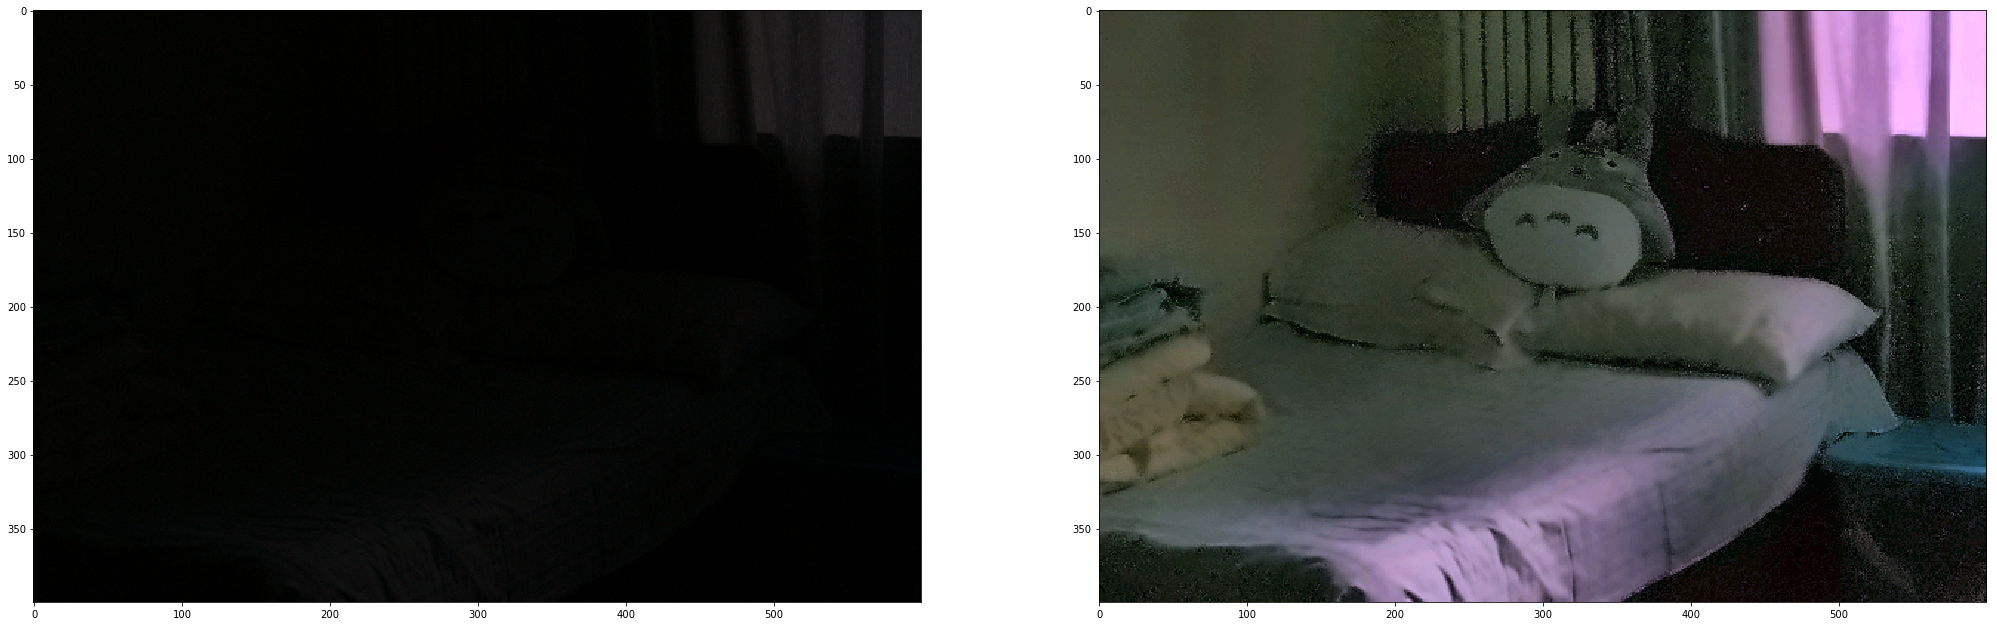

In [187]:
image = img_exposed
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV).astype(np.float32)
h, s, v = cv2.split(hsv)

mean_saturation = np.mean(s)

if mean_saturation < 40:
    sat_boost = 1.8
elif mean_saturation < 70:
    sat_boost = 1.5
elif mean_saturation < 100:
    sat_boost = 1.2
else:
    sat_boost = 1.0

s = np.clip(s * sat_boost, 0, 255)

hsv_enhanced = cv2.merge([h, s, v])
result = cv2.cvtColor(hsv_enhanced.astype(np.uint8), cv2.COLOR_HSV2BGR)

display(img,result)